# Author

- **Name**: Muhammad Murtadha Ramadhan<br>
- **Program**: MS in Business Analytics, USC Marshall School of Business

# First Data Understanding

In [1]:
# prompt: Load dataset LAX csv from this path /content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/Dataset

import pandas as pd
df_lax = pd.read_csv('/content/drive/MyDrive/Campus/Master Study/Courses/Fall 2024/DSO-528 Blended Data Business Analytics for Efficient Decisions/Dataset/LAX.csv')


In [ ]:
df_lax.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,1/1/13 6:00
1,2013,1,1,628.0,630,-2.0,1016.0,947,29.0,UA,1665,N33289,EWR,LAX,366.0,2454,6,30,1/1/13 6:00
2,2013,1,1,658.0,700,-2.0,1027.0,1025,2.0,VX,399,N627VA,JFK,LAX,361.0,2475,7,0,1/1/13 7:00
3,2013,1,1,702.0,700,2.0,1058.0,1014,44.0,B6,671,N779JB,JFK,LAX,381.0,2475,7,0,1/1/13 7:00
4,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,1/1/13 7:00


The dataset only contains 2013 period data

In [2]:
# prompt: show what are year and month available in df_lax

print(df_lax['year'].unique())
print(df_lax['month'].unique())


[2013]
[ 1 10 11 12  2  3  4  5  6  7  8  9]


The dataset only contains the flights with origin of New York airports which are JFK and EWR to Los Angeles which is LAX

In [3]:
# prompt: show the origin and destination available in df_lax

print(df_lax['origin'].unique())
print(df_lax['dest'].unique())


['JFK' 'EWR']
['LAX']


The dataset only contains the flight with carriers of
- UA = United Airlines
- VX = Virgin America
- B6 = JetBlue Airways
- AA = American Airlines
- DL = Delta Airlines

In [4]:
# prompt: show the flight carrier available in df_lax dataframe

print(df_lax['carrier'].unique())

['UA' 'VX' 'B6' 'AA' 'DL']


In [5]:
# prompt: add the carrier name column derived from carrier column in df_lax

carrier_dict = {'UA':'United Airlines', 'VX':'Virgin America', 'B6':'JetBlue Airways', 'AA':'American Airlines', 'DL':'Delta Airlines'}
df_lax['carrier_name'] = df_lax['carrier'].map(carrier_dict)
df_lax.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,carrier_name
0,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,1/1/13 6:00,United Airlines
1,2013,1,1,628.0,630,-2.0,1016.0,947,29.0,UA,1665,N33289,EWR,LAX,366.0,2454,6,30,1/1/13 6:00,United Airlines
2,2013,1,1,658.0,700,-2.0,1027.0,1025,2.0,VX,399,N627VA,JFK,LAX,361.0,2475,7,0,1/1/13 7:00,Virgin America
3,2013,1,1,702.0,700,2.0,1058.0,1014,44.0,B6,671,N779JB,JFK,LAX,381.0,2475,7,0,1/1/13 7:00,JetBlue Airways
4,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,1/1/13 7:00,American Airlines


In [6]:
# prompt: show summary stats of df_lax for columns of dep_delay, arr_delay, distance, hour, minute

df_lax[['dep_delay', 'arr_delay', 'distance', 'hour', 'minute']].describe()


,dep_delay,arr_delay,distance,hour,minute
count,16076.000000,16026.000000,16174.000000,16174.000000,16174.000000
mean,9.401344,0.547111,2468.622357,13.388834,23.004390
std,33.200801,39.755676,9.657222,4.586316,19.230663
min,-16.000000,-75.000000,2454.000000,5.000000,0.000000
25%,-4.000000,-21.000000,2454.000000,9.000000,0.000000
50%,-1.000000,-7.000000,2475.000000,13.000000,25.000000
75%,7.000000,10.000000,2475.000000,17.000000,40.000000
max,800.000000,784.000000,2475.000000,22.000000,59.000000


Referring to https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr, the unit for dep_delay and arr_delay is in minute

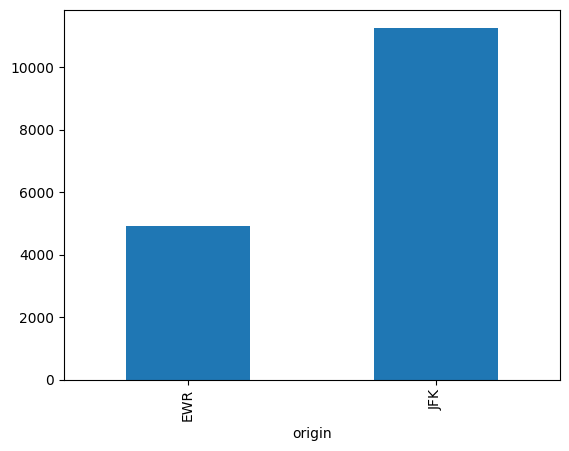

In [7]:
# prompt: show the aggregate chart by origin from df_lax

import matplotlib.pyplot as plt
df_lax.groupby('origin').size().plot(kind='bar')
plt.show()


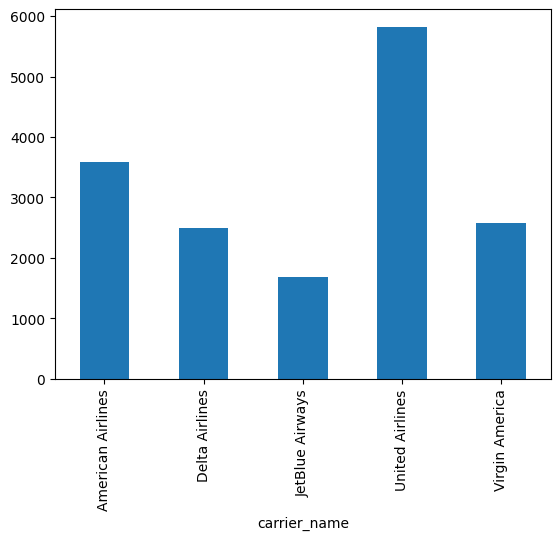

In [8]:
# prompt: show aggregate chart by carrier name from df_lax

import matplotlib.pyplot as plt
df_lax.groupby('carrier_name').size().plot(kind='bar')
plt.show()


# Analysis Scope

This analysis focuses on finding the factors that might affect the departure delay and arrival delay time on flights data with New York - Los Angeles route in 2013

# Analysis

**How is the general distribution of departure delay and arrival delay?**

**Insights:**
- The boxplot reveals potential outlier data points in the departure and arrival delay durations. However, when considering the maximum values of these variables—800 minutes (13.33 hours) for departure delays and 784 minutes (13.07 hours) for arrival delays—these outliers can be deemed reasonable.
- On average, the departure delay is longer, with an average of 9 minutes, compared to the 1-minute average for arrival delays.

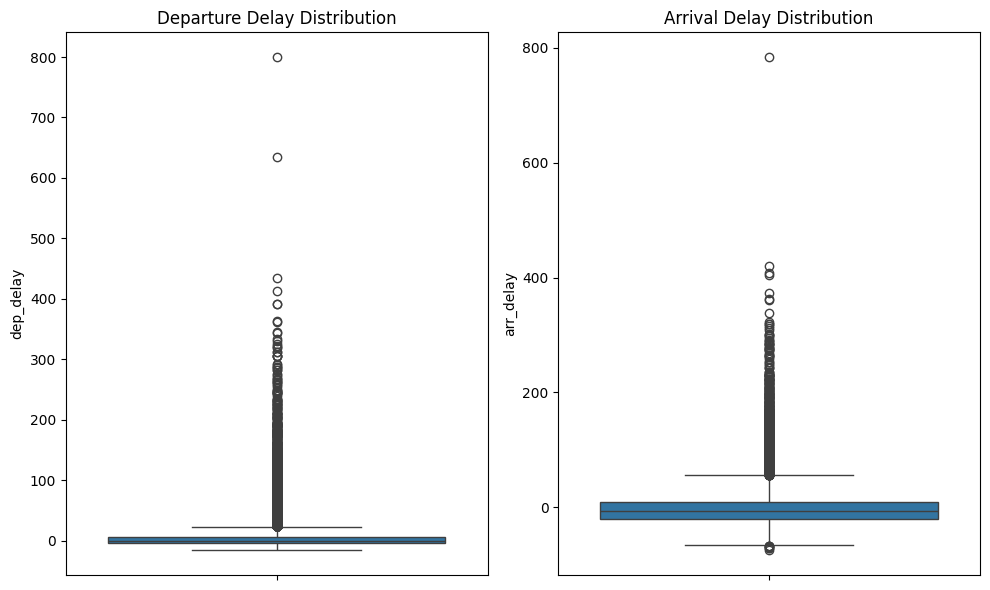

In [ ]:
# prompt: show box plot for dep_delay and arrival_delay from df_lax with vertical view

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=df_lax, y='dep_delay', ax=ax[0])
ax[0].set_title('Departure Delay Distribution')
sns.boxplot(data=df_lax, y='arr_delay', ax=ax[1])
ax[1].set_title('Arrival Delay Distribution')
plt.tight_layout()
plt.show()


In [9]:
# prompt: show summary statistics of departure and arrival delay with describe()

df_lax[['dep_delay', 'arr_delay']].describe()


,dep_delay,arr_delay
count,16076.000000,16026.000000
mean,9.401344,0.547111
std,33.200801,39.755676
min,-16.000000,-75.000000
25%,-4.000000,-21.000000
50%,-1.000000,-7.000000
75%,7.000000,10.000000
max,800.000000,784.000000


**How is the distribution of departure and arrival delay by origin airports?**

**Insights:**
- Comparing the average delay times for departures and arrivals at JFK and EWK airports indicates that the origin airport might influence the delays. Flights from EWK to LAX experience longer delays, with an average departure delay of 11.41 minutes and an arrival delay of 2.90 minutes, compared to flights from JFK to LAX, which have an average departure delay of 8.55 minutes and an arrival time slightly ahead of schedule at -0.48 minutes.

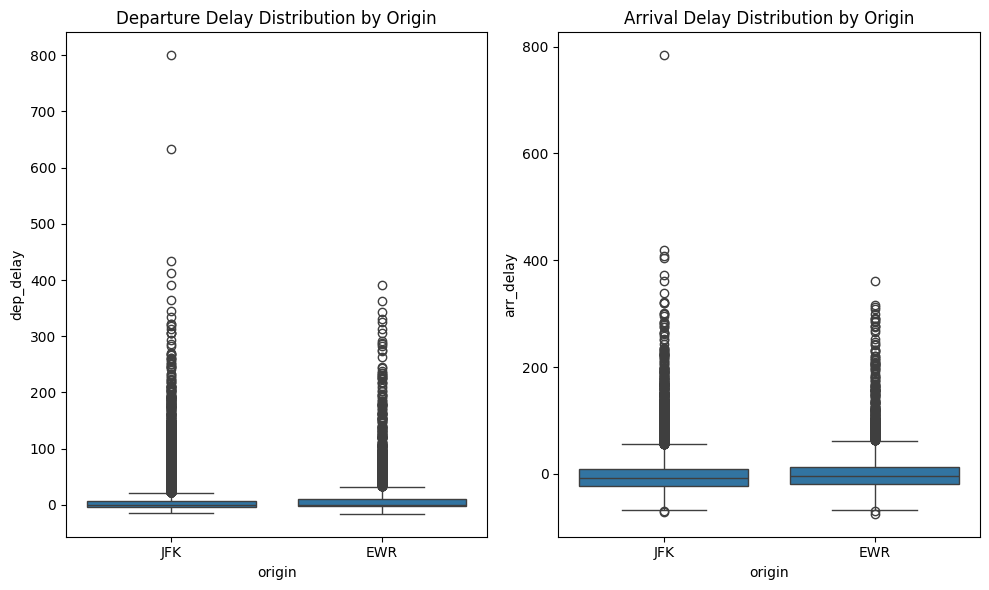

In [11]:
# prompt: show boxplot of departure and arrival delay distribution by origin

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=df_lax, x='origin', y='dep_delay', ax=ax[0])
ax[0].set_title('Departure Delay Distribution by Origin')
sns.boxplot(data=df_lax, x='origin', y='arr_delay', ax=ax[1])
ax[1].set_title('Arrival Delay Distribution by Origin')
plt.tight_layout()
plt.show()


In [12]:
# prompt: show summary statistics of departure and arrival delay by origin with describe()

df_lax.groupby('origin')[['dep_delay', 'arr_delay']].describe()


dep_delay                                                    arr_delay  \
           count       mean        std   min  25%  50%   75%    max     count   
origin                                                                          
EWR       4880.0  11.417623  33.409368 -16.0 -3.0  0.0  11.0  392.0    4867.0   
JFK      11196.0   8.522508  33.072532 -15.0 -4.0 -1.0   6.0  800.0   11159.0   

                                                           
            mean        std   min   25%  50%   75%    max  
origin                                                     
EWR     2.903431  40.155546 -75.0 -20.0 -5.0  13.0  362.0  
JFK    -0.480599  39.537857 -71.0 -22.0 -8.0   9.0  784.0

**How is the distribution of departure and arrival delay by flight carriers?**

**Insights:**

**On Departure Delay:**
- United Airlines Has the Highest Delays: United Airlines exhibits the largest spread in departure delays, with a higher median delay compared to the other airlines. This suggests that flights with United Airlines are more prone to experiencing longer delays.

- Delta Airlines Is the Most Consistent: Delta Airlines shows the smallest spread in departure delays, indicating that its performance is more consistent with fewer significant delays. This suggests Delta may have more effective scheduling or operational practices that keep delays minimal.

- Virgin America, JetBlue Airways, and American Airlines Are Similar: These airlines have similar median values and ranges for departure delays. However, JetBlue Airways has slightly more variability in its delays compared to Virgin America and American Airlines, which may point to occasional operational inconsistencies.

**On Arrival Delay:**
- Arrival Performance is Generally Good: All airlines have a median arrival delay that is close to zero or slightly negative, indicating that flights often arrive on time or early. This suggests that, overall, the airlines perform well in terms of keeping arrival delays minimal.

- Consistent Early Arrivals: The lower whiskers of the box plots for all airlines extend into the negative range, showing that early arrivals are common across the board. This is a positive aspect, as it means flights frequently arrive ahead of schedule.

- Delta Airlines and Virgin America are the Most Consistent: Delta Airlines and Virgin America show narrower distributions in arrival delays compared to the other airlines, with relatively tight interquartile ranges and fewer extreme values. This suggests that these airlines provide a more consistent experience for their passengers, with fewer significant delays.

- Greater Variability in United Airlines and JetBlue Airways: United Airlines and JetBlue Airways have wider ranges in their arrival delay distributions, indicating more variability. This suggests that passengers on these airlines might experience more inconsistency in arrival times, with some flights being significantly delayed while others arrive on time or early.

- American Airlines Shows Moderate Consistency: American Airlines has a median arrival delay close to zero and a range similar to that of Virgin America, indicating moderate consistency in arrival times. While not as tight as Delta's, it still performs relatively well in terms of minimizing severe delays.

- Potential Operational Differences: The differences in the spread of arrival delays among the airlines may reflect variations in operational efficiency, flight scheduling, or on-time management strategies. Delta's narrow range suggests it may have more effective processes to ensure punctual arrivals.

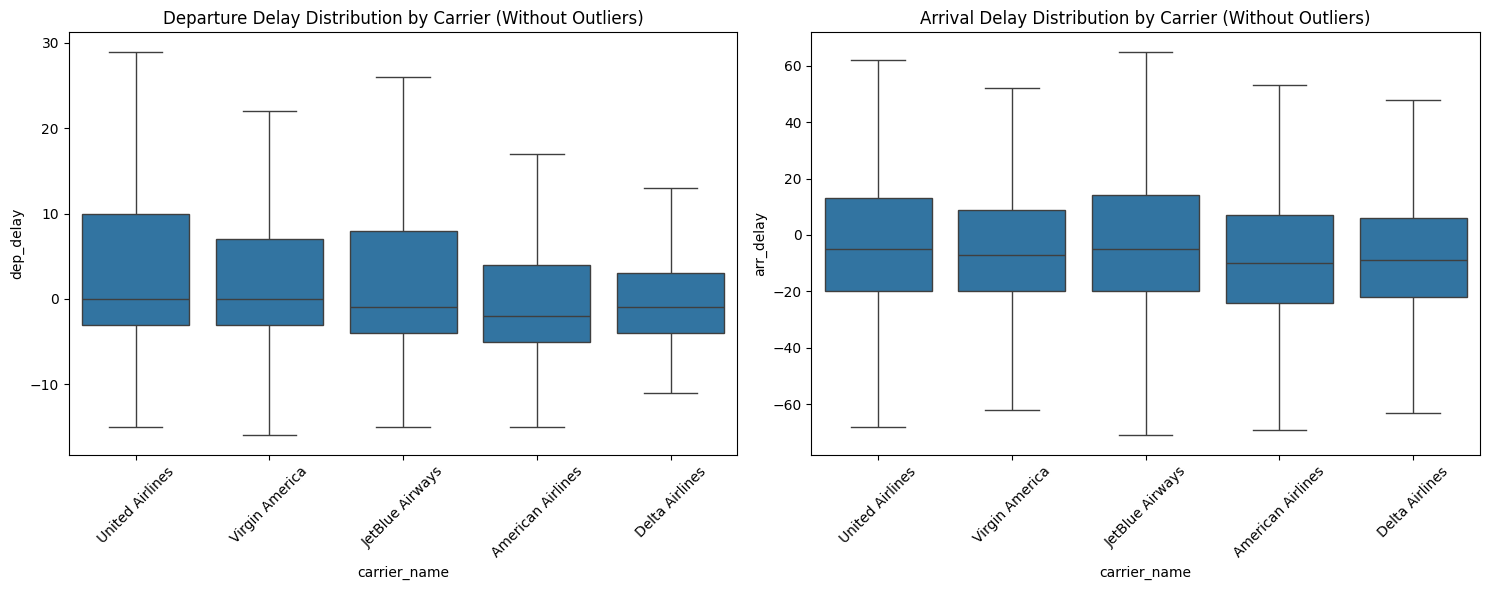

In [14]:
# prompt: show boxplot of departure and arrival delay by carrier name and make it in the way we can compare without outlier noises

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df_lax, x='carrier_name', y='dep_delay', showfliers=False, ax=ax[0])
ax[0].set_title('Departure Delay Distribution by Carrier (Without Outliers)')
ax[0].tick_params(axis='x', rotation=45)
sns.boxplot(data=df_lax, x='carrier_name', y='arr_delay', showfliers=False, ax=ax[1])
ax[1].set_title('Arrival Delay Distribution by Carrier (Without Outliers)')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
